In [40]:
import logging

import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn import cluster
from sklearn import decomposition

Import a face dataset, and filter the centered faces

In [41]:
rng = RandomState(0)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

Dataset consists of 400 faces


In [42]:
rows, cols = (faces_centered).shape

Take the ith-column, get its average and then subtract the average in each coordinate. In other words, compute the mean-projection of each column. Build a matrix with those mean projections.

In [43]:
mean_x = []
for i in range(0, cols):
    xi = faces_centered[:,i]
    avg_xi = np.average(xi)
    mean_x.append(xi - avg_xi)

mean_x = np.array(mean_x)
print(mean_x)

[[ 0.27765962  0.413311    0.01676508 ...  0.12508586  0.0899286
  -0.06032484]
 [ 0.2105005   0.36681306 -0.04212954 ...  0.13643911  0.05582736
  -0.12335172]
 [ 0.18085174  0.31237093 -0.06351385 ...  0.14811271  0.0261786
  -0.19019055]
 ...
 [-0.22626603  0.20690604  0.43019485 ... -0.17636044  0.11492859
  -0.00639922]
 [-0.22262965  0.35930276  0.41317004 ... -0.13966621  0.09377156
  -0.10193641]
 [-0.22770198  0.3872883   0.28413078 ... -0.14887077  0.09696371
  -0.06981864]]


Compute the transpose matrix to calculate the covariance matrix

In [44]:
mean_x_transpose = mean_x.transpose()
print(mean_x_transpose)

[[ 0.27765962  0.2105005   0.18085174 ... -0.22626603 -0.22262965
  -0.22770198]
 [ 0.413311    0.36681306  0.31237093 ...  0.20690604  0.35930276
   0.3872883 ]
 [ 0.01676508 -0.04212954 -0.06351385 ...  0.43019485  0.41317004
   0.28413078]
 ...
 [ 0.12508586  0.13643911  0.14811271 ... -0.17636044 -0.13966621
  -0.14887077]
 [ 0.0899286   0.05582736  0.0261786  ...  0.11492859  0.09377156
   0.09696371]
 [-0.06032484 -0.12335172 -0.19019055 ... -0.00639922 -0.10193641
  -0.06981864]]


Compute the covariance matrix

In [45]:
covariance_matrix = (np.matmul(mean_x, mean_x_transpose))*(1/cols)
print(covariance_matrix)

[[ 0.00316705  0.00304898  0.00263503 ... -0.00041462 -0.00030585
  -0.00018262]
 [ 0.00304898  0.00331726  0.00308134 ... -0.00075719 -0.0006292
  -0.00046949]
 [ 0.00263503  0.00308134  0.00339142 ... -0.00113398 -0.00096941
  -0.00079638]
 ...
 [-0.00041462 -0.00075719 -0.00113398 ...  0.0038468   0.00355384
   0.00321544]
 [-0.00030585 -0.0006292  -0.00096941 ...  0.00355384  0.00385721
   0.00361568]
 [-0.00018262 -0.00046949 -0.00079638 ...  0.00321544  0.00361568
   0.0037374 ]]


Compute the eigenvalues and eigenvectors from the covariance matrix

In [46]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [47]:
eigenvalues.shape

(4096,)

In [48]:
eigen = {}
for i in range(0, len(eigenvalues)):
    eigenvalue = eigenvalues[i]
    eigen[eigenvalue] = eigenvectors[:,i]


Take the eigenvalues, and its respective eigenvectors, with the highest values

In [49]:
eigenvalues.sort()
eigenvalues = eigenvalues[::-1]

In [50]:
eigenvalues

array([ 1.1001891e+00,  6.1670756e-01,  4.3051848e-01, ...,
       -1.0197565e-08, -1.0216468e-08, -1.0580979e-08], dtype=float32)

In [136]:
eigen_faces = []
for i in range(0,36):
    eigen_faces.append(eigen[eigenvalues[i]])
eigen_faces = np.array(eigen_faces)

In [137]:
eigen_faces.shape

(36, 4096)

Plot the faces from the eigenvectors

In [138]:
n_row, n_col = 6, 6
n_components = n_row * n_col
image_shape = (64, 64)

def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

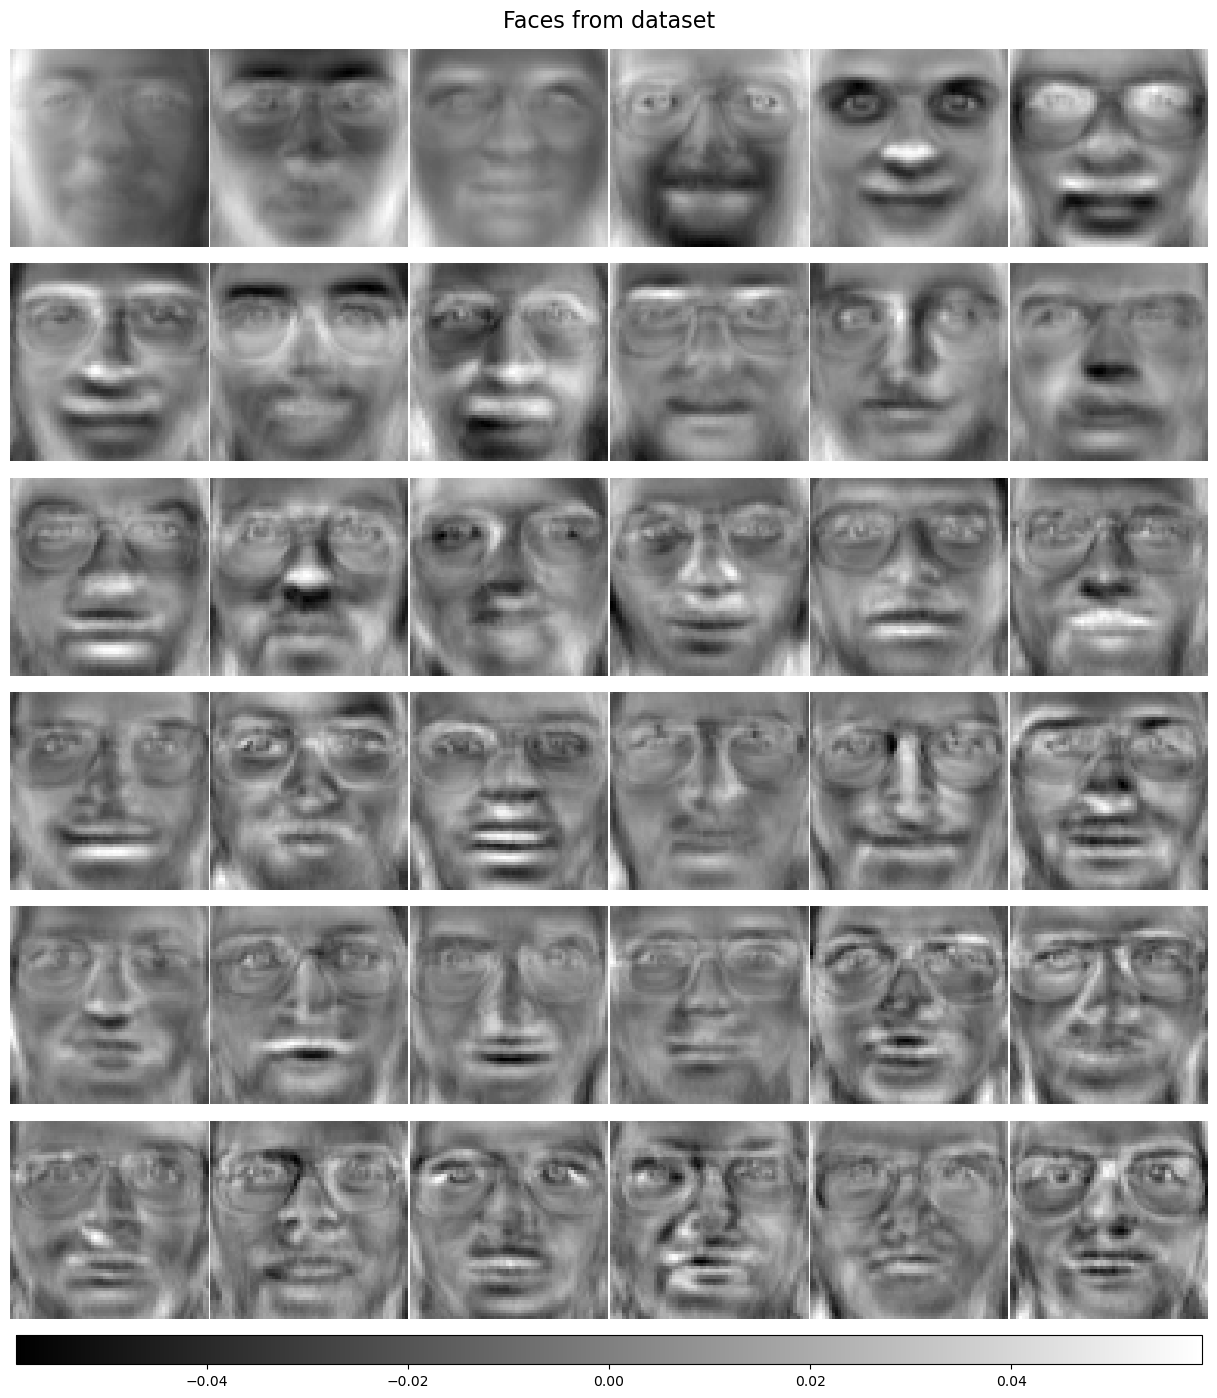

In [139]:
plot_gallery("Faces from dataset", eigen_faces)

In [140]:
from PIL import Image
import requests
from PIL import ImageOps
from IPython.display import display
import urllib.request
import numpy as np

In [158]:
img = Image.open("Downloads/cropped(3).jpg")
img = img.convert("L")

In [159]:
vector_image = []
for y in range(0, img.height):
    for x in range(0, img.width):
        vector_image.append(img.getpixel((x,y)))

vector_image = np.array(vector_image)

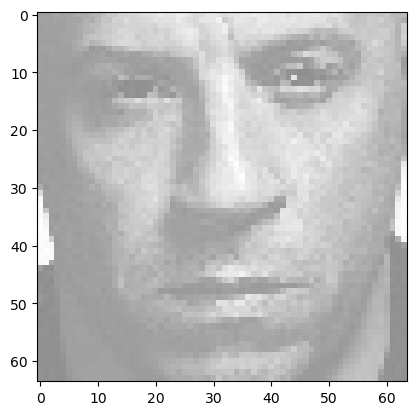

In [166]:
vmax = max(vector_image.max(), -vector_image.min())
imgplot = plt.imshow(img, cmap="gray", interpolation="nearest", vmin = -vmax, vmax=vmax)

In [171]:
projections = {}
for face in eigen_faces:
    print(np.dot(vector_image, face))
    print("=============")
    projection = face*(np.dot(vector_image, face)/np.dot(face, face))
    projections[(np.dot(vector_image, face)/np.dot(face, face))] = projection

-814.3714139623116
-1283.4138221103167
-666.1762532597315
-244.63393738008017
-9.859616038824242
471.6387622337302
-678.6009155902161
789.9497314622738
-90.55397074566304
-107.93444204608079
128.47939391828425
227.34688481354624
-67.96676157384172
53.645850758524944
-65.8726388507298
-14.116511853607562
-162.78513726683377
-181.64700926941475
212.80170944316433
248.74893160926877
-185.2208194444047
-529.4619623701719
440.10886307545957
-240.66679349937442
416.9930486446124
179.61656223050022
-137.99279433755692
-80.74306668235886
89.41253757791813
39.259586849520474
-154.00888208654533
153.223774889756
140.58508650158228
-240.40989105323752
-27.347757125658234
89.57973858446348


In [175]:
higher_eigenfaces = list(projections.keys())
higher_eigenfaces = sorted(higher_eigenfaces, key=abs)
best_eigenfaces = []
for i in higher_eigenfaces:
    best_eigenfaces.append(projections[i])

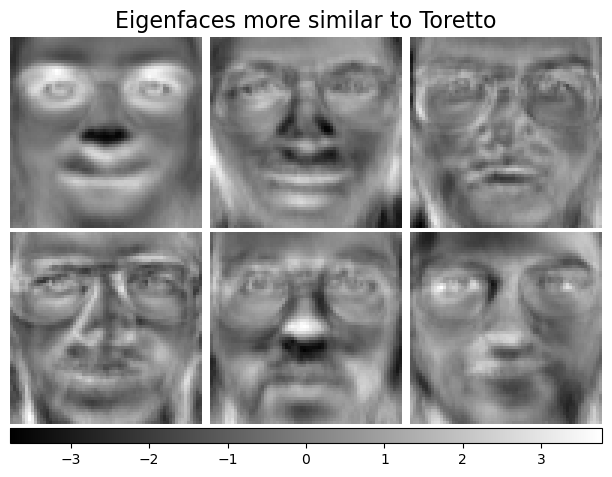

In [179]:
plot_gallery("Eigenfaces more similar to Toretto", best_eigenfaces[:6], 3,2)